In [16]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

%matplotlib inline

In [25]:
fn = '/home/bmoorema/Desktop/Hakai_data/SuperCO2_FannyBay5mindata_submission.txt'
FannyBay = pd.read_csv(
    fn, delim_whitespace=True, header=0, names=['Yearday', 'Year', 'mtime', 'date', 'time', 'pCO2', 'T', 'S'],
    skiprows=6,
)
fn = '/home/bmoorema/Desktop/Hakai_data/SuperCO2_quadra5mindata_submission.txt'
Quadra1 = pd.read_csv(
    fn, delim_whitespace=True, header=0, names=['Yearday', 'Year', 'mtime', 'date', 'time', 'pCO2', 'T', 'S'],
    skiprows=6,
)
fn = '/home/bmoorema/Desktop/Hakai_data/QuadraBoL_5mindata_submission.txt'
Quadra2 = pd.read_csv(
    fn, delim_whitespace=True, header=0, names=['Yearday', 'Year', 'mtime', 'date', 'time', 'pCO2', 'T', 'S'],
    skiprows=6,
)

In [26]:
FBtime = [
    datetime.fromordinal(int(mtime)) + timedelta(days=mtime%1) -
    timedelta(days = 366) for mtime in FannyBay.mtime.values
]
Q1time = [
    datetime.fromordinal(int(mtime)) + timedelta(days=mtime%1) -
    timedelta(days = 366) for mtime in Quadra1.mtime.values
]
Q2time = [
    datetime.fromordinal(int(mtime)) + timedelta(days=mtime%1) -
    timedelta(days = 366) for mtime in Quadra2.mtime.values
]

(0, 2000)

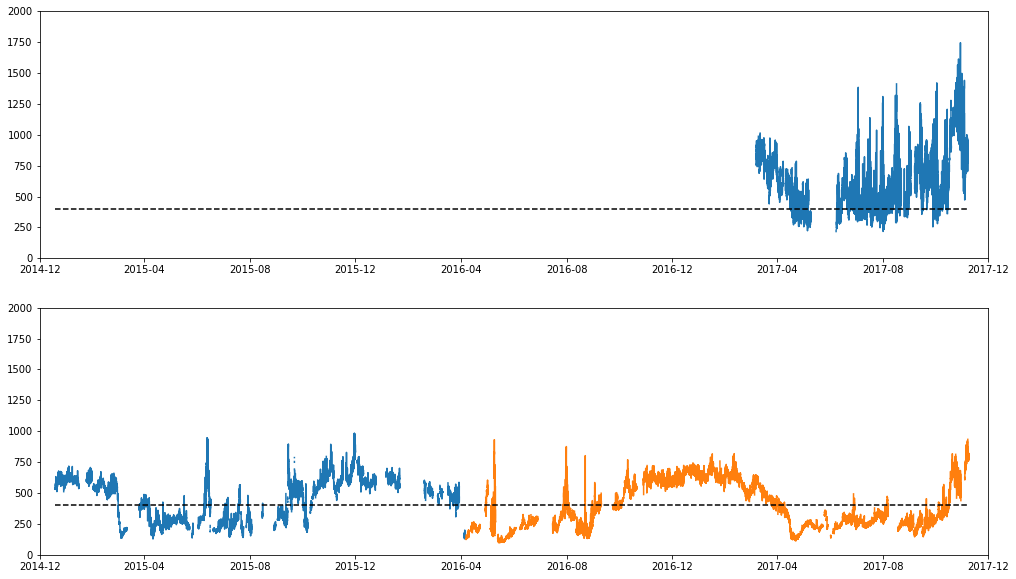

In [37]:
fig, axs = plt.subplots(2, 1, figsize=(17, 10))
axs[0].plot(FBtime, FannyBay.pCO2)
axs[1].plot(Q1time, Quadra1.pCO2)
axs[1].plot(Q2time, Quadra2.pCO2)
axs[0].plot([Q1time[0], Q2time[-1]], [400, 400], 'k--')
axs[1].plot([Q1time[0], Q2time[-1]], [400, 400], 'k--')

axs[0].set_xlim(['2014 Dec 1', '2017 Dec 1'])
axs[0].set_ylim([0, 2000])
axs[1].set_xlim(['2014 Dec 1', '2017 Dec 1'])
axs[1].set_ylim([0, 2000])